#Dependências

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.multiarray import ndarray
import pandas as pd

/tmp/ipython-input-4150328498.py:4: DeprecationWarning: numpy.core.multiarray is deprecated and has been renamed to numpy._core.multiarray. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.ndarray.
  from numpy.core.multiarray import ndarray


# Configuração dos Gráficos

In [23]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15

# Utils

In [24]:
def gera_parabola(x: ndarray) -> ndarray:
  ruido = np.random.randn(x.shape[0])/60
  return 2*((x-0.3)**2 -0.45*x+0.3) + ruido

In [25]:
def normalize(array):
  return (array - array.min()) / (array.max() - array.min())

#Dataset e Normalização

In [106]:
# idades = np.array([18, 20, 25, 28, 30, 32, 40, 50, 55, 65, 70])
idades = np.arange(18, 91, 2)

n_idades = normalize(idades)
n_valores = gera_parabola(n_idades)
valores = n_valores * 10000

print(n_idades)

print(f"\nEXEMPLOS:{len(n_idades)}")

[0.         0.02777778 0.05555556 0.08333333 0.11111111 0.13888889
 0.16666667 0.19444444 0.22222222 0.25       0.27777778 0.30555556
 0.33333333 0.36111111 0.38888889 0.41666667 0.44444444 0.47222222
 0.5        0.52777778 0.55555556 0.58333333 0.61111111 0.63888889
 0.66666667 0.69444444 0.72222222 0.75       0.77777778 0.80555556
 0.83333333 0.86111111 0.88888889 0.91666667 0.94444444 0.97222222
 1.        ]

EXEMPLOS:37


Text(0.5, 1.0, 'Valor do seguro em função da idade')

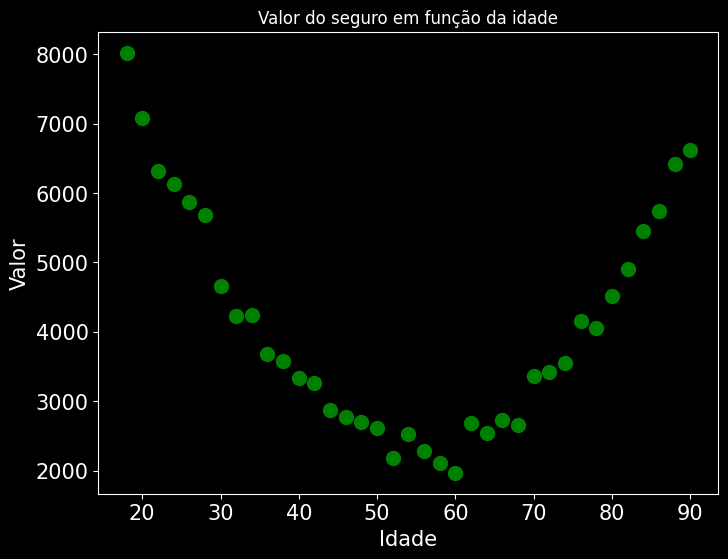

In [83]:
plt.scatter(idades,valores, s=100,color = "green")
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('Valor do seguro em função da idade', fontdict={'size':12})

Text(0.5, 1.0, 'Valor do seguro em função da idade (Normalizados)')

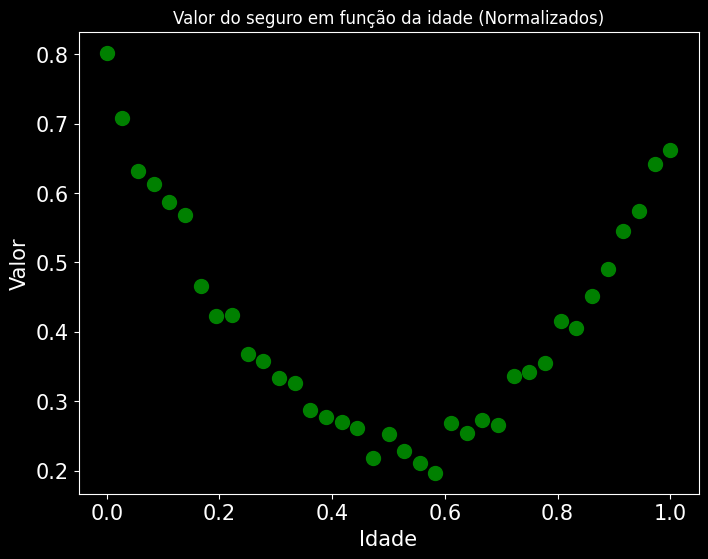

In [84]:
plt.scatter(n_idades,n_valores, s=100,color = "green")
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('Valor do seguro em função da idade (Normalizados)', fontdict={'size':12})

In [85]:
df = pd.DataFrame({'idade':n_idades, 'valor': n_valores})
df

,idade,valor
0,0.000000,0.802495
1,0.027778,0.708957
2,0.055556,0.631808
3,0.083333,0.612537
4,0.111111,0.587582
5,0.138889,0.568792
6,0.166667,0.466168
7,0.194444,0.422517
8,0.222222,0.424571
9,0.250000,0.368458


# Arquitetura do Modelo

In [86]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(2, input_shape=(1,)),
#     tf.keras.layers.Activation('sigmoid'),
#     tf.keras.layers.Dense(1)
# ])


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation="sigmoid", input_shape=(1,)),
    tf.keras.layers.Dense(1)
])


adam = tf.keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer=adam, loss='mse')

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

# Treinamento

In [87]:
log = model.fit(n_idades, n_valores, epochs=400)
losses = log.history['loss']

Epoch 1/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1023 
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0501
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0552
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0271
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0432
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0412
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0264
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0248
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0282
Epoch 10/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0274 
Epoch 11/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0247
Epoch 12/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0243 
Epoch 13/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0259
Epoch 14/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0238
Epoch 15/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0240
Epoch 16/400
2/2

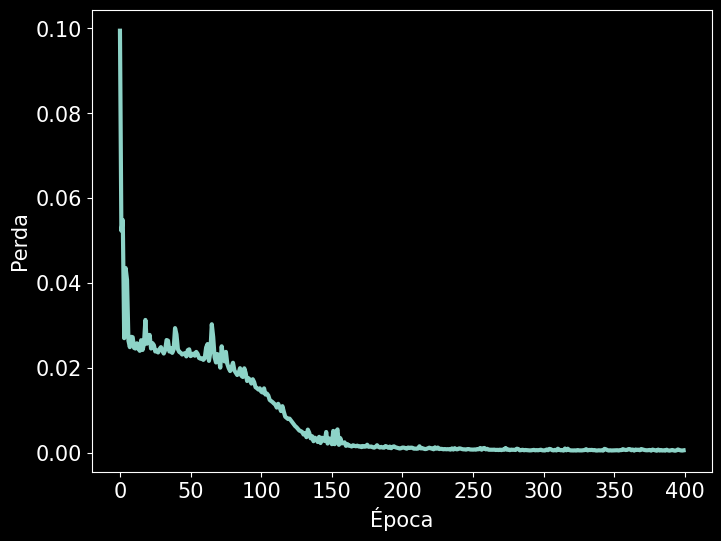

In [88]:
plt.plot(losses)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

#Teste

In [120]:
n_idades_teste = np.arange(0.1, 1.00, 0.1)

print(n_idades)
print(n_idades_teste)
print(f"\nEXEMPLOS:{len(n_idades_teste)}")

n_valores_n1 = []
n_valores_n2 = []

weights, biases = model.layers[0].get_weights()

for i in n_idades_teste:
  n_valores_n1.append(i * weights[0][0] + biases[0])
  n_valores_n2.append(i * weights[0][1] + biases[1])

n_valores_n1 = np.array(n_valores_n1)
n_valores_n2 = np.array(n_valores_n2)


[0.         0.02777778 0.05555556 0.08333333 0.11111111 0.13888889
 0.16666667 0.19444444 0.22222222 0.25       0.27777778 0.30555556
 0.33333333 0.36111111 0.38888889 0.41666667 0.44444444 0.47222222
 0.5        0.52777778 0.55555556 0.58333333 0.61111111 0.63888889
 0.66666667 0.69444444 0.72222222 0.75       0.77777778 0.80555556
 0.83333333 0.86111111 0.88888889 0.91666667 0.94444444 0.97222222
 1.        ]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]

EXEMPLOS:9


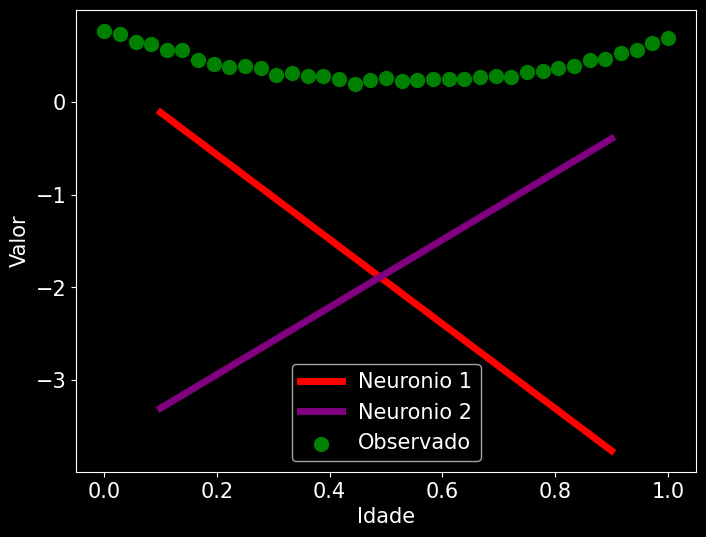

In [122]:
plt.plot(n_idades_teste, n_valores_n1, color="red", lw=5, label = 'Neuronio 1')
plt.plot(n_idades_teste, n_valores_n2, color="purple", lw=5, label = 'Neuronio 2')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

In [123]:
n_valores_ativados_n1 = []
n_valores_ativados_n2 = []

for i in n_idades_teste:
  n_valores_l1 = model.layers[0](np.array([i])[:,None])

  n_valores_ativados_n1.append(n_valores_l1[0][0])
  n_valores_ativados_n2.append(n_valores_l1[0][1])

n_valores_ativados_n1 = np.array(n_valores_ativados_n1)
n_valores_ativados_n2 = np.array(n_valores_ativados_n2)



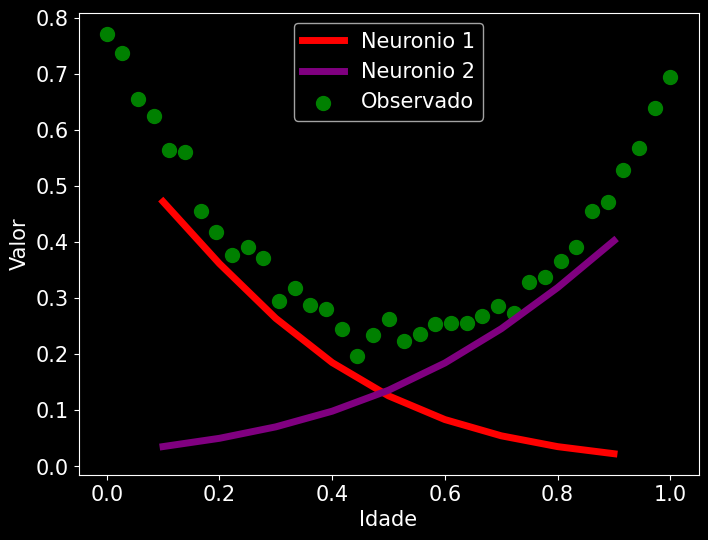

In [124]:
plt.plot(n_idades_teste, n_valores_ativados_n1, color="red", lw=5, label = 'Neuronio 1')
plt.plot(n_idades_teste, n_valores_ativados_n2, color="purple", lw=5, label = 'Neuronio 2')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

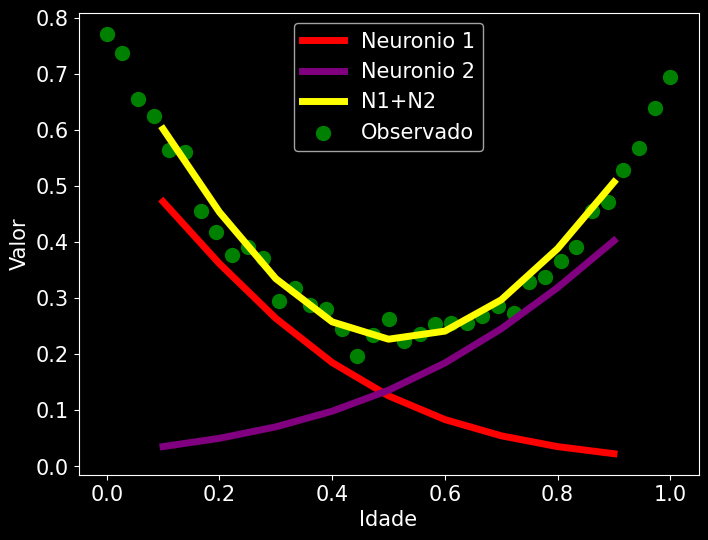

In [125]:
weights, biases = model.layers[1].get_weights()
n1n2 = n_valores_ativados_n1 * weights[0] + n_valores_ativados_n2 * weights[1] + biases[0]

plt.plot(n_idades_teste, n_valores_ativados_n1, color="red", lw=5, label = 'Neuronio 1')
plt.plot(n_idades_teste, n_valores_ativados_n2, color="purple", lw=5, label = 'Neuronio 2')
plt.plot(n_idades_teste, n1n2, color="yellow", lw=5, label = 'N1+N2')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

In [128]:
# n_idades_teste = np.arange(0.1, 1.5, 0.1)

n_valores_teste = []

n_valores_ativados_n1 = []
n_valores_ativados_n2 = []

for i in n_idades_teste:
  n_valores_teste.append(model.predict(np.array([i]))[0][0])

n_valores_teste = np.array(n_valores_teste)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


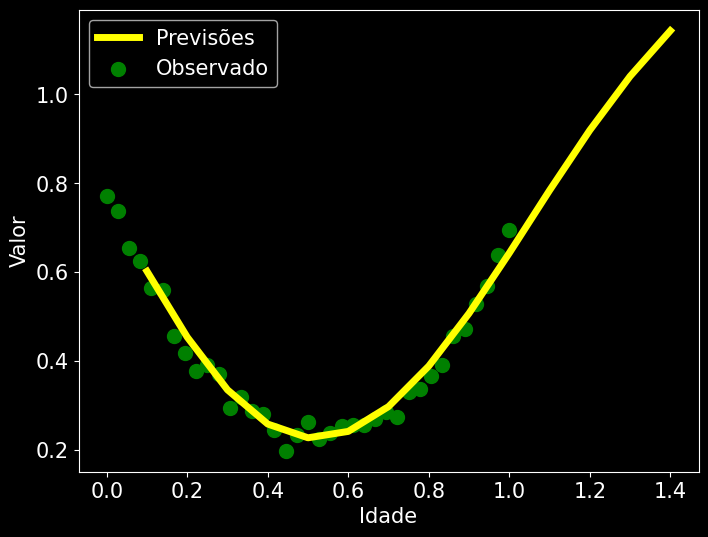

In [129]:
plt.plot(n_idades_teste, n_valores_teste, color="yellow", lw=5, label = 'Previsões')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()